## Linear Model Selection and Regularization
### Lab1 Subset selection method
Including the *bestsubset*, *forward* and *backward* stepwise subset selection method. 

In [60]:
library (ISLR)
names(Hitters)
dim(Hitters)

[1] "AtBat"     "Hits"      "HmRun"     "Runs"      "RBI"       "Walks"    
 [7] "Years"     "CAtBat"    "CHits"     "CHmRun"    "CRuns"     "CRBI"     
[13] "CWalks"    "League"    "Division"  "PutOuts"   "Assists"   "Errors"   
[19] "Salary"    "NewLeague"

[1] 263  20

Firstly,  clean the data without the Salar field, we can see the number of the incomplete entries

In [61]:
sum(is.na(Hitters$Salary))

[1] 0

In [62]:
Hitters=na.omit(Hitters)
dim(Hitters)

[1] 263  20

### *bestsubset*, *forward* and *backward* stepwise subset selection 
* Use the **`regsubsets`** function provided by the **leaps** library to do subsect selection.  Use `summary` to see the overall results. 

In [63]:
library(leaps)
regfit.full = regsubsets(Salary~., Hitters)
summary(regfit.full)

Subset selection object
Call: regsubsets.formula(Salary ~ ., Hitters)
19 Variables  (and intercept)
           Forced in Forced out
AtBat          FALSE      FALSE
Hits           FALSE      FALSE
HmRun          FALSE      FALSE
Runs           FALSE      FALSE
RBI            FALSE      FALSE
Walks          FALSE      FALSE
Years          FALSE      FALSE
CAtBat         FALSE      FALSE
CHits          FALSE      FALSE
CHmRun         FALSE      FALSE
CRuns          FALSE      FALSE
CRBI           FALSE      FALSE
CWalks         FALSE      FALSE
LeagueN        FALSE      FALSE
DivisionW      FALSE      FALSE
PutOuts        FALSE      FALSE
Assists        FALSE      FALSE
Errors         FALSE      FALSE
NewLeagueN     FALSE      FALSE
1 subsets of each size up to 8
Selection Algorithm: exhaustive
         AtBat Hits HmRun Runs RBI Walks Years CAtBat CHits CHmRun CRuns CRBI
1  ( 1 ) " "   " "  " "   " "  " " " "   " "   " "    " "   " "    " "   "*" 
2  ( 1 ) " "   "*"  " "   " "  " " " "   

By default, it only use a maximum of **8** variables in the model. To let to fit model using up to all of the predictors, use the `nvmax` arguments. By defautl, it does the best subset selection method, while by providing the `method=[forward|backward]` option, it can de forward/backward stepwise subset selection.

In [64]:
regfit.full = regsubsets(Salary~., Hitters, nvmax=19)
regfit.fwd = regsubsets(Salary~., Hitters, nvmax=19, method='forward')
regfit.fwd = regsubsets(Salary~., Hitters, nvmax=19, method='backward')

See the coefficient of a model with a specific number of predictors:

In [65]:
coef(regfit.full, 7)

(Intercept)         Hits        Walks       CAtBat        CHits       CHmRun 
  79.4509472    1.2833513    3.2274264   -0.3752350    1.4957073    1.4420538 
   DivisionW      PutOuts 
-129.9866432    0.2366813

#### Choose the model with lowest test MSE using Cp, BIC and adjusted R^2
See the RSQ, R^2, Cp, BIC, and adjust $R^2$ of the subset model from the summary data

In [66]:
reg.summary = summary(regfit.full)
names(reg.summary)

[1] "which"  "rsq"    "rss"    "adjr2"  "cp"     "bic"    "outmat" "obj"

In [67]:
reg.summary$rsq

[1] 0.3214501 0.4252237 0.4514294 0.4754067 0.4908036 0.5087146 0.5141227
 [8] 0.5285569 0.5346124 0.5404950 0.5426153 0.5436302 0.5444570 0.5452164
[15] 0.5454692 0.5457656 0.5459518 0.5460945 0.5461159

In [68]:
reg.summary$adjr2

[1] 0.3188503 0.4208024 0.4450753 0.4672734 0.4808971 0.4972001 0.5007849
 [8] 0.5137083 0.5180572 0.5222606 0.5225706 0.5217245 0.5206736 0.5195431
[15] 0.5178661 0.5162219 0.5144464 0.5126097 0.5106270

Find the model with the highest adjusted $R^2$

In [69]:
which.max(reg.summary$adjr2)

[1] 11

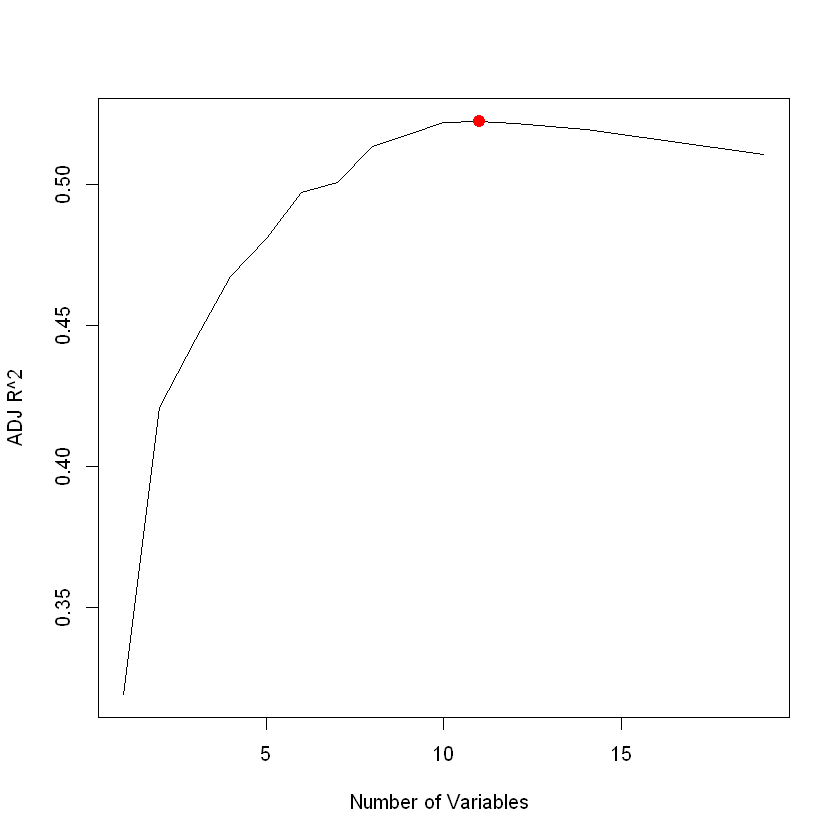

In [70]:
plot(reg.summary$adjr2 ,xlab="Number of Variables ",ylab="ADJ R^2", type="l")
points(11, reg.summary$adjr2[11], col="red",cex=2,pch=20)

#### Choose the model with lowest test MSE using  validation set and cross-validation approach
**NOTE**: Should use only the training observation to perform all aspects of model fitting including variable selection.

First, we see the **validation set approach**

In [71]:
set.seed(1)
train = sample(c(TRUE, FALSE), nrow(Hitters), rep=TRUE)
test = (!train)
regfit.best = regsubsets(Salary~., data=Hitters[train,], nvmax=19)

Now, we build a test data maxtrix **X** using **model.matrix**

In [72]:
test.mat = model.matrix(Salary~., data=Hitters[test,])

Now, compute the test MSE for best models of different size(num. of variables). Because there is no `preddict` function for `regsubsets` results, we have to calculate the simulated response manually

In [73]:
val.errors=rep(NA, 19)
for (i in 1:19){
    coefi = coef(regfit.best, id=i)
    pred = test.mat[, names(coefi)]%*%coefi
    val.errors[i] = mean((Hitters$Salary[test] - pred)^2)
}

In [74]:
val.errors

[1] 220968.0 169157.1 178518.2 163426.1 168418.1 171270.6 162377.1 157909.3
 [9] 154055.7 148162.1 151156.4 151742.5 152214.5 157358.7 158541.4 158743.3
[17] 159972.7 159859.8 160105.6

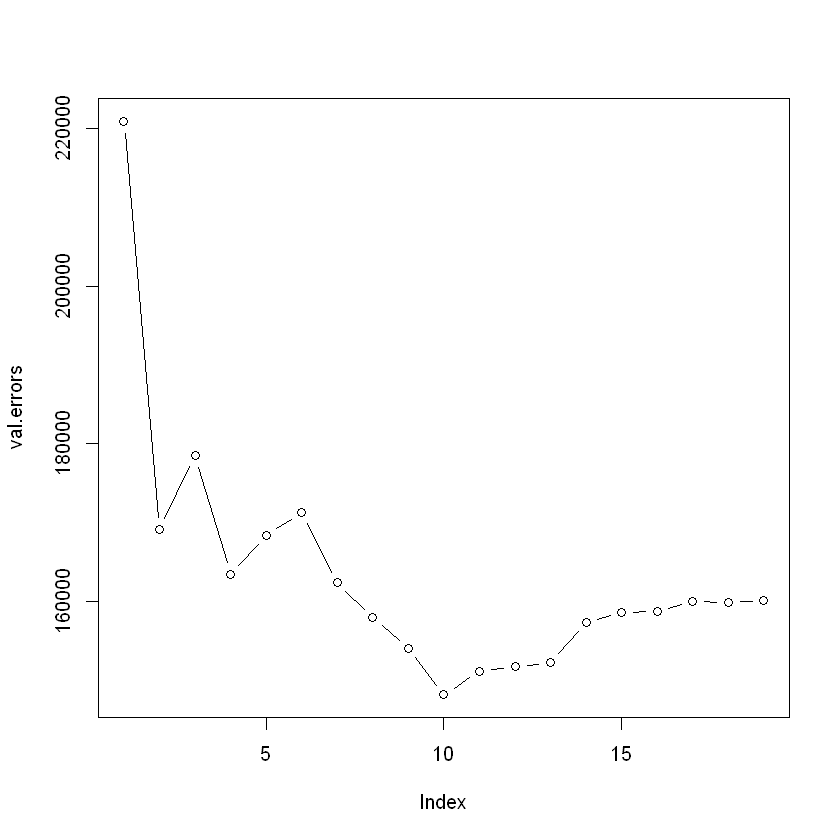

In [75]:
plot(val.errors, type='b')

In [76]:
which.min(val.errors)

[1] 10

In [77]:
coef(regfit.best, 10)

(Intercept)       AtBat        Hits       Walks      CAtBat       CHits 
-80.2751499  -1.4683816   7.1625314   3.6430345  -0.1855698   1.1053238 
     CHmRun      CWalks     LeagueN   DivisionW     PutOuts 
  1.3844863  -0.7483170  84.5576103 -53.0289658   0.2381662

Note: we can write our own function to do the minic the `predict`:

In [78]:
predict.regsubsets  = function(object, newdata, id, ...){
    form = as.formula(object$call[[2]])
    mat = model.matrix(form, newdata)
    coefi = coef(object, id=id)
    xvars = names(coefi)
    mat[, xvars]%*%coefi
}

Now we can test our predict function

In [79]:
predict.regsubsets(regfit.best, Hitters[1,], 1 )

379.6462


Now, we use **cross-validation** approach to choose the best model from those of different sizes:

We first assign eath observation into 10 folds randomly (i.e. k = 10 in c.v.).

In [80]:
k = 10
set.seed(1)
folds = sample(1:k, nrow(Hitters), replace=TRUE)
cv.errors = matrix(NA, k, 19, dimnames=list(NULL, paste(1:19)))

In [81]:
cv.errors

1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [82]:
paste(1:19)

[1] "1"  "2"  "3"  "4"  "5"  "6"  "7"  "8"  "9"  "10" "11" "12" "13" "14" "15"
[16] "16" "17" "18" "19"

In [83]:
for (j in 1:k){
    best.fit=regsubsets(Salary~., data=Hitters[folds!=j,], nvmax=19)
    for (i in 1:19){
        pred = predict(best.fit, Hitters[folds==j,], id=i)
        cv.errors[j,i] = mean((Hitters$Salary[folds==j] - pred)^2)
    }
}

In [84]:
cv.errors

1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
187479.08,141652.61,163000.36,169584.40,141745.39,151086.36,193584.17,144806.44,159388.10,138585.25,140047.07,158928.92,161322.76,155152.28,153394.07,153336.85,153069.00,152838.76,153197.11
96953.41,63783.33,85037.65,76643.17,64943.58,56414.96,63233.49,63054.88,60503.10,60213.51,58210.21,57939.91,59975.07,58629.57,58961.90,58757.55,58570.71,58890.03,58949.25
165455.17,167628.28,166950.43,152446.17,156473.24,135551.12,137609.30,146028.36,131999.41,122733.87,127967.69,129804.19,133746.86,135748.87,137937.17,140321.51,141302.29,140985.80,140392.48
124448.91,110672.67,107993.98,113989.64,108523.54,92925.54,104522.24,96227.18,93363.36,96084.53,99397.85,100151.19,103073.96,106622.46,106211.72,107797.54,106288.67,106913.18,106919.66
136168.29,79595.09,86881.88,94404.06,89153.27,83111.09,86412.18,77319.95,80439.75,75912.55,81680.13,83861.19,85111.01,84901.63,82829.44,84923.57,83994.95,84184.48,84284.62
171886.20,120892.96,120879.58,106957.31,100767.73,89494.38,94093.52,86104.48,84884.10,80575.26,80155.27,75768.73,76927.44,76529.74,78219.76,78256.23,77973.40,79151.81,78988.92
56375.90,74835.19,72726.96,59493.96,64024.85,59914.20,62942.94,60371.85,61436.77,62082.63,66155.09,65960.47,66310.58,70079.10,69553.50,68242.10,68114.27,67961.32,67943.62
93744.51,85579.47,98227.05,109847.35,100709.25,88934.97,90779.58,77151.69,75016.23,71782.40,76971.60,77696.55,78460.91,81107.16,82431.25,82213.66,81958.75,81893.97,81848.89
421669.62,454728.90,437024.28,419721.20,427986.39,401473.33,396247.58,381851.15,369574.22,376137.45,373544.77,382668.48,375284.60,376527.06,374706.25,372917.91,371622.53,373745.20,372365.67
146753.76,102599.22,192447.51,208506.12,214085.78,224120.38,214037.26,169160.95,177991.11,169239.17,147408.48,149955.85,194397.12,194448.21,174012.18,172060.78,184614.12,184397.75,183156.97


In [85]:
mean.cv.errors = apply(cv.errors, 2, mean)

In [86]:
mean.cv.errors

1        2        3        4        5        6        7        8 
160093.5 140196.8 153117.0 151159.3 146841.3 138302.6 144346.2 130207.7 
       9       10       11       12       13       14       15       16 
129459.6 125334.7 125153.8 128273.5 133461.0 133974.6 131825.7 131882.8 
      17       18       19 
132750.9 133096.2 132804.7

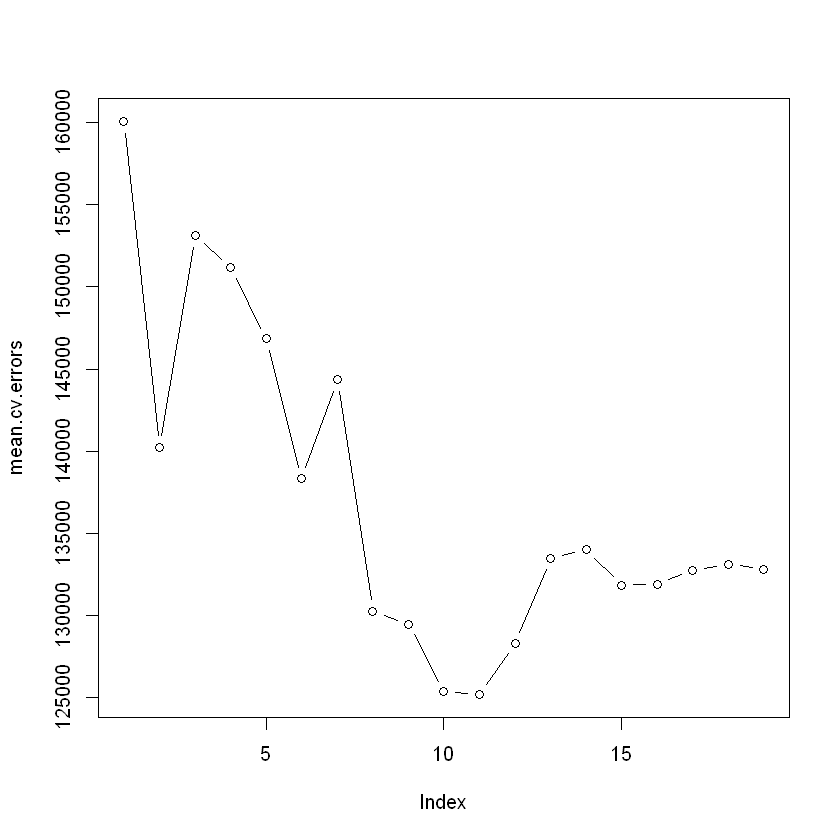

In [87]:
plot(mean.cv.errors, type='b')

In [88]:
which.min(mean.cv.errors)

11 
11

So the cross-validation set approach selects the 11-variabls model. To obtain the model we want, we have to fit the 11-variables model on our full data:

In [89]:
reg.best = regsubsets(Salary~., data=Hitters, nvmax=19)
coef(reg.best, 11)

(Intercept)        AtBat         Hits        Walks       CAtBat        CRuns 
 135.7512195   -2.1277482    6.9236994    5.6202755   -0.1389914    1.4553310 
        CRBI       CWalks      LeagueN    DivisionW      PutOuts      Assists 
   0.7852528   -0.8228559   43.1116152 -111.1460252    0.2894087    0.2688277

### Lab 2  Ridge Regression and the Lasso

Use the **`glmnet`** package to perform the ridge regression and the lasso regression
Unlike other function used before, the `glmnet` require independent `x` and `y` input. Use the **model.matrix** to extract the `x`. Note that the `model.matrix` convert all qualitative variables to dummy variables, and by providing the `Salary~.`, it can move the Salary column to the last column.

In [90]:
x = model.matrix(Salary~.,Hitters)[,-1]
y = Hitters$Salary

#### Ridge regression

In [91]:
library(glmnet)

Use the function `glmnet` to do either ridge or lasso regression. It can also do other types of regression.
First, generate a serial of $\lambda$, and do the ridge regression by providing the argument `alpha=0`. If `alpha=1`, then the function does lasso regression.

In [92]:
grid = 10^seq(10,-2, length=100)
ridge.mod = glmnet(x, y, alpha=0, lambda=grid)

The `glmnet` fucntion will standarlize the variables. This feature can be turned off via arg `standardize=FALSE`.

In [93]:
dim(coef(ridge.mod))

[1]  20 100

So it has 100 sets of model coefficients coressponding to the 100 $\lambda$ values. The 50th set of coefficients is 

In [94]:
coef(ridge.mod)[,50]

(Intercept)         AtBat          Hits         HmRun          Runs 
407.356050200   0.036957182   0.138180344   0.524629976   0.230701523 
          RBI         Walks         Years        CAtBat         CHits 
  0.239841459   0.289618741   1.107702929   0.003131815   0.011653637 
       CHmRun         CRuns          CRBI        CWalks       LeagueN 
  0.087545670   0.023379882   0.024138320   0.025015421   0.085028114 
    DivisionW       PutOuts       Assists        Errors    NewLeagueN 
 -6.215440973   0.016482577   0.002612988  -0.020502690   0.301433531

where the $\lambda$ is

In [95]:
grid[50]

[1] 11497.57

The $\lambda$ can also be repored from the resutls itself,

In [96]:
ridge.mod$lambda[50]

[1] 11497.57

We can check the values of $\sqrt{\beta_1^2 + \beta_2^2 + \ldots + \beta_p^2}$

In [97]:
sqrt(sum(coef(ridge.mod)[-1,50]^2))

[1] 6.360612

In [98]:
ridge.mod$lambda[60]
sqrt(sum(coef(ridge.mod)[-1,60]^2) )

[1] 705.4802

[1] 57.11001

To see $\beta_j$ for a new $\lambda$, use `predict`, for example, the $\beta_j$ for $\lambda=50$ is

In [99]:
predict(ridge.mod, s=50, type='coefficients')[1:20,]

(Intercept)         AtBat          Hits         HmRun          Runs 
 4.876610e+01 -3.580999e-01  1.969359e+00 -1.278248e+00  1.145892e+00 
          RBI         Walks         Years        CAtBat         CHits 
 8.038292e-01  2.716186e+00 -6.218319e+00  5.447837e-03  1.064895e-01 
       CHmRun         CRuns          CRBI        CWalks       LeagueN 
 6.244860e-01  2.214985e-01  2.186914e-01 -1.500245e-01  4.592589e+01 
    DivisionW       PutOuts       Assists        Errors    NewLeagueN 
-1.182011e+02  2.502322e-01  1.215665e-01 -3.278600e+00 -9.496680e+00

Now, estimate test MSE using validation set approach

In [100]:
set.seed(1)
train=sample(1:nrow(x), nrow(x)/2) # if not use arg `replace=TRUE`, it will generate a list of unique number
test = (-train)
y.test = y[test]

Fit using the training set

In [101]:
ridge.mod=glmnet(x[train, ], y[train], alpha=0, lambda=grid, thresh=1e-12)
ridge.pred=predict(ridge.mod, s=4, newx=x[test, ]) # to be used to evaluate test MSE, need to provide s, i.e. $\labmda$
mean((ridge.pred - y.test)^2)

[1] 101036.8

Use cross-validation approach to select the most propriate value of $\lambda$, can use simply the build-in `cv.glmnet()` fucntion:

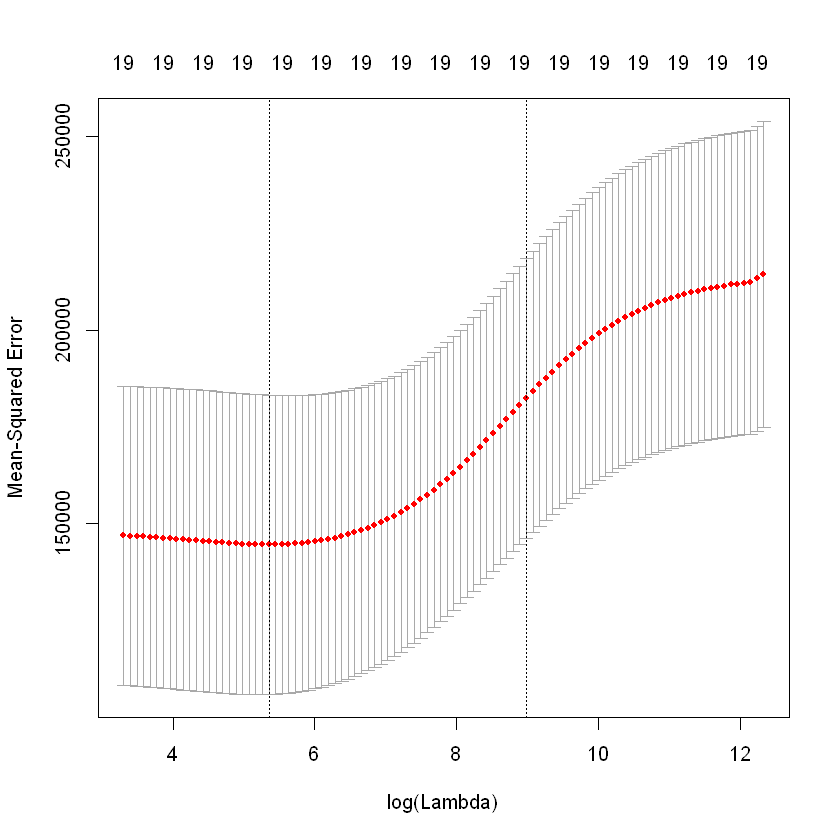

In [102]:
set.seed(1)
cv.out=cv.glmnet(x[train,], y[train], alpha=0)
plot(cv.out) #can plot the result

In [103]:
bestlam=cv.out$lambda.min
bestlam

[1] 211.7416

In [104]:
# to see test MSE with that value of lambda
ridge.pred=predict(ridge.mod, s=bestlam, newx=x[test,])
mean((ridge.pred-y.test)^2)

[1] 96015.51

As can been seen above, the test error is lower.

Finally, refit the model using the best $lambad$ and our full data:

In [105]:
Out=glmnet(x, y, alpha=0)
predict(Out, type='coefficients', s=bestlam)[1:20,]

(Intercept)        AtBat         Hits        HmRun         Runs          RBI 
  9.88487157   0.03143991   1.00882875   0.13927624   1.11320781   0.87318990 
       Walks        Years       CAtBat        CHits       CHmRun        CRuns 
  1.80410229   0.13074381   0.01113978   0.06489843   0.45158546   0.12900049 
        CRBI       CWalks      LeagueN    DivisionW      PutOuts      Assists 
  0.13737712   0.02908572  27.18227535 -91.63411299   0.19149252   0.04254536 
      Errors   NewLeagueN 
 -1.81244470   7.21208390

#### Lasso regression

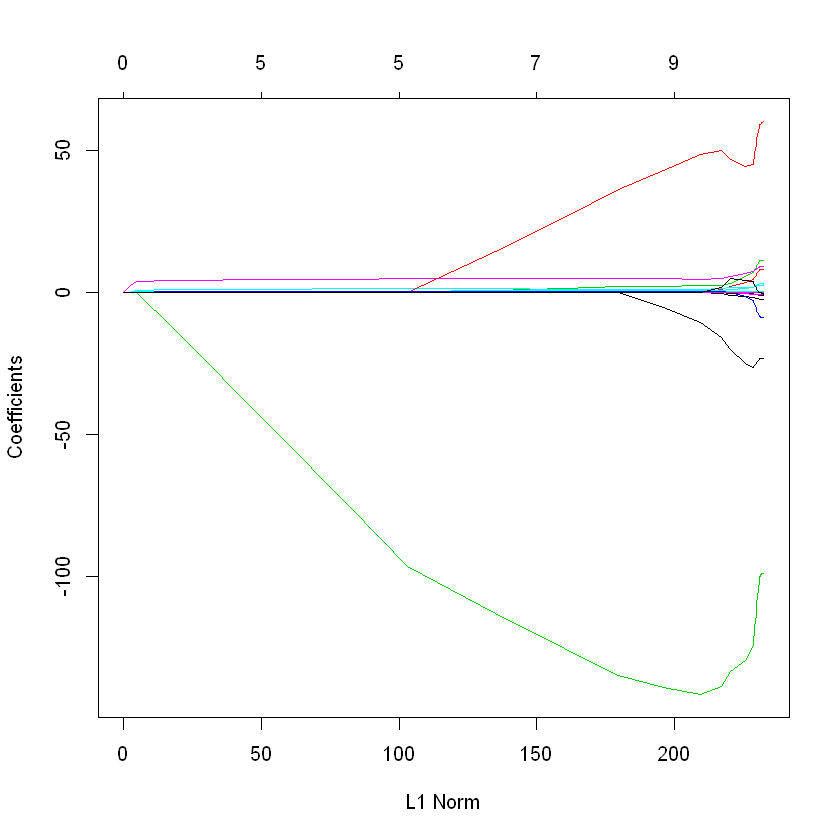

In [106]:
lasso.mod=glmnet(x[train,], y[train], alpha=1, lambda=grid)
plot(lasso.mod)

Use CV to get the optizmized value of $\lambda$

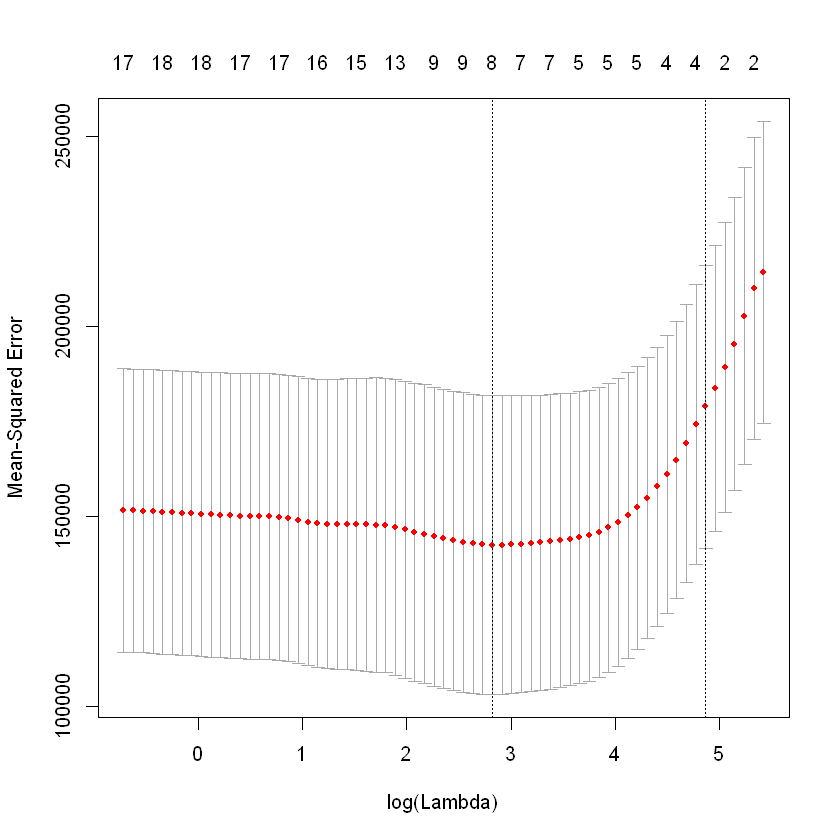

In [107]:
set.seed(1)
cv.out=cv.glmnet(x[train,],y[train], alpha=1)
plot(cv.out)
bestlam=cv.out$lambda.min

In [108]:
bestlam

[1] 16.78016

In [109]:
lasso.pred=predict(lasso.mod, s=bestlam, newx=x[test,])
mean((lasso.pred-y.test)^2)

[1] 100743.4

In [110]:
out=glmnet(x, y, alpha=1)
predict(out, type='coefficients', s=bestlam)[1:20,]

(Intercept)        AtBat         Hits        HmRun         Runs          RBI 
  19.5223994    0.0000000    1.8701714    0.0000000    0.0000000    0.0000000 
       Walks        Years       CAtBat        CHits       CHmRun        CRuns 
   2.2187934    0.0000000    0.0000000    0.0000000    0.0000000    0.2072852 
        CRBI       CWalks      LeagueN    DivisionW      PutOuts      Assists 
   0.4127984    0.0000000    1.7591971 -103.5051402    0.2206884    0.0000000 
      Errors   NewLeagueN 
   0.0000000    0.0000000

### Lab3: Princple Component Regression and Partial Linear Regression

Use the function **`pcr()`** of the library **`pls`** to do the PCR. `pls` is a package for Partial Least Squares and Principal Component Regression

In [112]:
library(pls)
set.seed(2)
pcr.fit=pcr(Salary~., data=Hitters, scale=TRUE, validation='CV') # by default use 10-fold CV for each value of M

In [114]:
summary(pcr.fit)

Data: 	X dimension: 263 19 
	Y dimension: 263 1
Fit method: svdpc
Number of components considered: 19

VALIDATION: RMSEP
Cross-validated using 10 random segments.
       (Intercept)  1 comps  2 comps  3 comps  4 comps  5 comps  6 comps
CV             452    348.9    352.2    353.5    352.8    350.1    349.1
adjCV          452    348.7    351.8    352.9    352.1    349.3    348.0
       7 comps  8 comps  9 comps  10 comps  11 comps  12 comps  13 comps
CV       349.6    350.9    352.9     353.8     355.0     356.2     363.5
adjCV    348.5    349.8    351.6     352.3     353.4     354.5     361.6
       14 comps  15 comps  16 comps  17 comps  18 comps  19 comps
CV        355.2     357.4     347.6     350.1     349.2     352.6
adjCV     352.8     355.2     345.5     347.6     346.7     349.8

TRAINING: % variance explained
        1 comps  2 comps  3 comps  4 comps  5 comps  6 comps  7 comps  8 comps
X         38.31    60.16    70.84    79.03    84.29    88.63    92.26    94.96
Salary    4

NOTE: The reported CV above is the root mean square error, needed to be squared for the real MSE, use the following validation plot to see the MSE

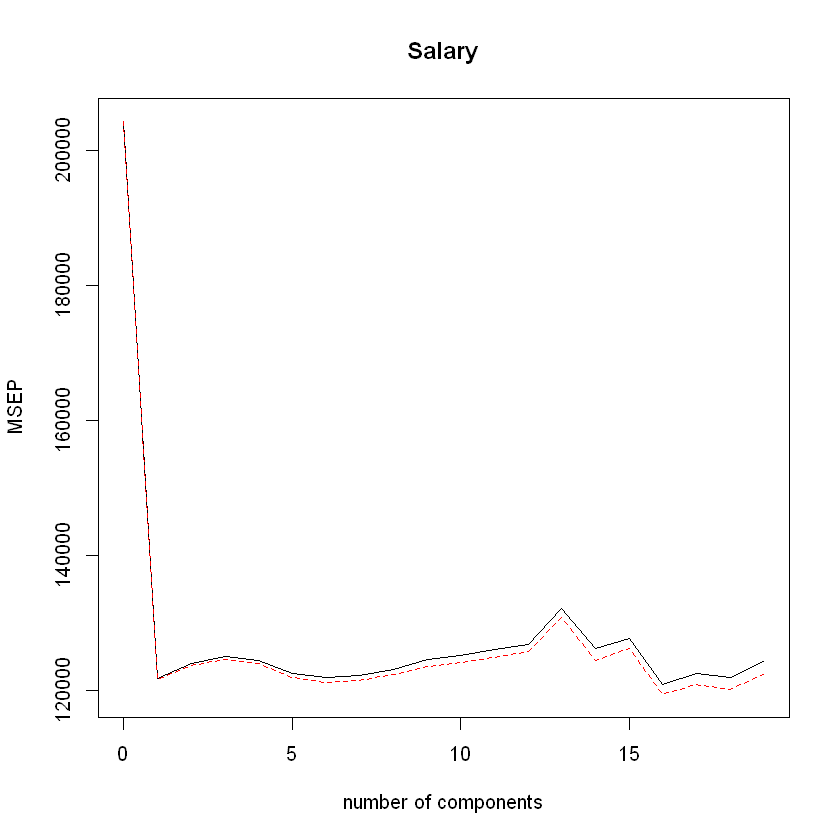

In [115]:
 validationplot(pcr.fit,val.type="MSEP")